In [22]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [183]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

def plot_cor_matrix(corr, mask=None, title=None, ticks=None, save_path=None):
    f, ax = plt.subplots(figsize=(4, 3))
    h_ax = sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, 
                vmin=-1, 
                vmax=1, 
                center=0,
                cmap='coolwarm_r')
    if title is not None:
        h_ax.set_title(title)
    if ticks is not None:
        h_ax.set_yticklabels(ticks)
        h_ax.set_xticklabels(ticks)
        h_ax.set_xticklabels(ticks, rotation=45)
    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight")
    plt.show()

In [179]:
quality_paths = glob.glob("./eval/results/*quality*")

In [180]:
df = pd.concat((pd.read_csv(p) for p in quality_paths))

In [181]:
cols = ["alignment_score", "fluency_score", "grammaticality_score", "gutcheck_f1_score"]

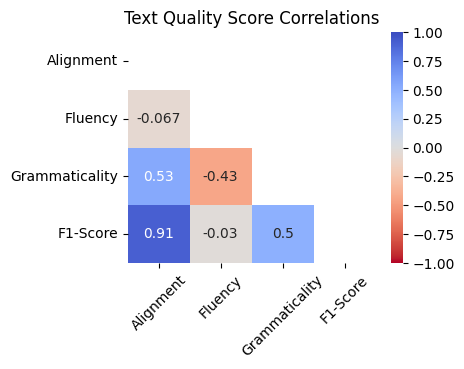

In [187]:
corr = df[cols].corr()
mask = np.triu(corr)
plot_cor_matrix(corr=corr,
                mask=mask,
                title="Text Quality Score Correlations",
                ticks=["Alignment", "Fluency", "Grammaticality", "F1-Score"],
                save_path="./imgs/quality_corrs.png")

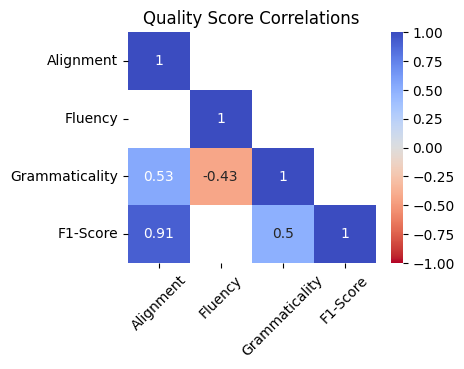

In [188]:
corr = df[cols].corr()                      # get correlation
p_values = corr_sig(df[cols])               # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr=corr,
                mask=mask,
                title="Quality Score Correlations",
                ticks=["Alignment", "Fluency", "Grammaticality", "F1-Score"],
                save_path="./imgs/quality_corrs_sig_masked.png")

In [110]:
df[["eval_grammaticality", "comp_grammaticality", "grammaticality_score"]]

,eval_grammaticality,comp_grammaticality,grammaticality_score
0,4.08750,2.35625,0.576453
1,4.64375,1.94375,0.418573
2,4.87500,2.17500,0.446154
3,3.77500,1.86250,0.493377
4,4.56250,2.02500,0.443836
...,...,...,...
31,7.58800,7.30000,0.962045
32,7.86200,7.13800,0.907911
33,13.44750,8.11500,0.603458
34,13.32400,7.74400,0.581207


In [138]:
df[["eval_fluency", "comp_fluency", "fluency_score"]]

,eval_fluency,comp_fluency,fluency_score
0,290.209664,90.411113,0.311537
1,335.601732,82.061706,0.244521
2,407.178764,95.540844,0.234641
3,323.044075,94.501914,0.292536
4,280.132355,90.940325,0.324633
...,...,...,...
31,111.964468,102.137061,0.912227
32,106.977594,119.649886,1.118457
33,215.665624,113.309289,0.525393
34,215.363631,106.200231,0.493121
